In [13]:
import pandas as pd
import numpy as np

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split

In [14]:
protein_data = pd.read_csv('./total_e+xias.csv')
print(type(protein_data))

<class 'pandas.core.frame.DataFrame'>


In [15]:
# 데이터셋 레이블 과 기능 으로 나누기
y = protein_data.SC
X = protein_data.drop ( 'xias', axis = 1)

In [16]:
# 데이터셋  분할 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)

print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)


X_train:

                                                     SEQ  SC
27471  MAEEEAKGLDYIPEIVLKKRKNRDELAFIRKKQLELGNSGKKKKKV...   0
8115   MLTREKAIEFLNSNDTGPILEMLNLINGTNNGKNITYSKNAFIPVC...   1
20314  MKLSESTINKDYPFLSEEEDSKIISLICNYLSLGQFELARALILQS...   0
5530   MEDPIKAIEEIFKKADQIFKFLDVKVINLEKGRAVVEIPYKEEFTR...   1
20175  MKSSGLFPFLVLLALGTLAPWAVEGSGKSFKAGVCPPKKSAQCLRY...   0
(23153, 2)

X_test:

                                                     SEQ  SC
13804  MVDQVNLATEQTSLLYPEVSRKKEELSVNKWTILPALWVGGFLSAL...   0
30416  MMPYNTPPNIQEPMNFASSNPFGIIPDALSFQNFKYDRLQQQQQQQ...   0
16798  MATLLLLLGVLVVSPDALGSTTAVQTPTSGEPLVSTSEPLSSKMYT...   0
19697  MKVLKRDSMLLLITLYFLLTTSMARQDPFLVGVEKDVVPAGTDLKQ...   0
7618   MIDRFGRPLEDLRITLTHACNFECFFCHMEGEEGDNYLLSKEDILL...   1
(9923, 2)


In [17]:
print("\nX_train:\n")
print(y_train.head())
print(y_train.shape)

print("\nX_test:\n")
print(y_test.head())
print(y_test.shape)


X_train:

27471    0
8115     1
20314    0
5530     1
20175    0
Name: SC, dtype: int64
(23153,)

X_test:

13804    0
30416    0
16798    0
19697    0
7618     1
Name: SC, dtype: int64
(9923,)


In [18]:
a =X_train.loc[:,['SEQ']].values # SEQ열에 해당하는 데이터를 모두 읽어옴 (위에서 아래로)
print(type(a))

<class 'numpy.ndarray'>


In [20]:
a[0]

array(['MAEEEAKGLDYIPEIVLKKRKNRDELAFIRKKQLELGNSGKKKKKVSDIKRPEDFVHEFRAKEVDMIRMKQRVKRPKSSPPPVKSDLVFIIRIQGKNDMHPKTKRILNNLQLKSVFTGVFAKATDSLFQKLLKVQPYVTYGYPNDKSVKDLIYKKGCTIIEGNPVPLTDNNIIEQALGEHKILGIEDLVNEIARVGDHFREVMRFLGPLKLNKPVADVLHRKKQVFSEGGDTGNREDKINDLISKMN'],
      dtype=object)

In [21]:
b = X_test.loc[:,['SEQ']].values

In [22]:
b[0]

array(['MVDQVNLATEQTSLLYPEVSRKKEELSVNKWTILPALWVGGFLSALDMTIVASLYPVIGSEFKLMNNASYIVTAYLITNTAFQPLYGRLSDIFGRRPTVVFANAAFTLGTFWCGISRSLPELCMARALAGIGGGGLGTMSSIISSDIVSLRERGTWQGITNIVWGIGGSLGGPLGGLIAQRWGWRTAFHFQVPMGILSTILVAWRVRVKPTVRNSNASLLSRIDYLGSFLLVTGITALVVTFNMGGDAFPWVSPVIITLLVSSVLILFAFYWVEKNIAVEPIAPVEILSQPTPLNVCLGNFFNAFCSFVIVYELPLFFETTLLMPSSEAGVRIFPYVISTSVGSLCSGLYMKKTGRYRNLVIAGFFFMLMGIVSFAVLTSFGHRTPLILISLCLAMTGCSYGMNLTSTLIAIISSLAPEEQAVATGLSYLFRATGSVIGISLSQTTTLSILMKQLASNLKDDPDKDDLIRRLRESISIIPNLPKDIQKLVIKSYATAFTWTFALVAIIAFAGFWCSLRIKQFYLHTSVDRS'],
      dtype=object)

In [23]:
c = X_train.loc[:,['SC']].values

In [24]:
len(c)

23153

In [25]:
d = X_test.loc[:,['SC']].values

In [26]:
def split_data(train): # dataset ->a (X_train)
    list_test = []
    for i in range(train.shape[0]): #  39999,2
        presplit = train[i] # a의 0번째 의 SEQ부터 최대크기까지(30000) 넣고 
        list_test.append(list(presplit[0])) #한글자씩 잘라서 리스트에 저장

    return list_test #모든 SEQ를 한글자씩 잘라놓은것을 리턴

train = split_data(a)

print(train[0])
print(len(train))

['M', 'A', 'E', 'E', 'E', 'A', 'K', 'G', 'L', 'D', 'Y', 'I', 'P', 'E', 'I', 'V', 'L', 'K', 'K', 'R', 'K', 'N', 'R', 'D', 'E', 'L', 'A', 'F', 'I', 'R', 'K', 'K', 'Q', 'L', 'E', 'L', 'G', 'N', 'S', 'G', 'K', 'K', 'K', 'K', 'K', 'V', 'S', 'D', 'I', 'K', 'R', 'P', 'E', 'D', 'F', 'V', 'H', 'E', 'F', 'R', 'A', 'K', 'E', 'V', 'D', 'M', 'I', 'R', 'M', 'K', 'Q', 'R', 'V', 'K', 'R', 'P', 'K', 'S', 'S', 'P', 'P', 'P', 'V', 'K', 'S', 'D', 'L', 'V', 'F', 'I', 'I', 'R', 'I', 'Q', 'G', 'K', 'N', 'D', 'M', 'H', 'P', 'K', 'T', 'K', 'R', 'I', 'L', 'N', 'N', 'L', 'Q', 'L', 'K', 'S', 'V', 'F', 'T', 'G', 'V', 'F', 'A', 'K', 'A', 'T', 'D', 'S', 'L', 'F', 'Q', 'K', 'L', 'L', 'K', 'V', 'Q', 'P', 'Y', 'V', 'T', 'Y', 'G', 'Y', 'P', 'N', 'D', 'K', 'S', 'V', 'K', 'D', 'L', 'I', 'Y', 'K', 'K', 'G', 'C', 'T', 'I', 'I', 'E', 'G', 'N', 'P', 'V', 'P', 'L', 'T', 'D', 'N', 'N', 'I', 'I', 'E', 'Q', 'A', 'L', 'G', 'E', 'H', 'K', 'I', 'L', 'G', 'I', 'E', 'D', 'L', 'V', 'N', 'E', 'I', 'A', 'R', 'V', 'G', 'D', 'H', 'F', 'R',

In [27]:
def split_data(test): # dataset ->(X_test)
    list_test = []
    for i in range(test.shape[0]): #  39999,2
        presplit = test[i] # b의 0번째 의 SEQ부터 최대크기까지(30000) 넣고 
        list_test.append(list(presplit[0])) #한글자씩 잘라서 리스트에 저장

    return list_test #모든 SEQ를 한글자씩 잘라놓은것을 리턴

test = split_data(b)
print(test[0])
print(len(test))

['M', 'V', 'D', 'Q', 'V', 'N', 'L', 'A', 'T', 'E', 'Q', 'T', 'S', 'L', 'L', 'Y', 'P', 'E', 'V', 'S', 'R', 'K', 'K', 'E', 'E', 'L', 'S', 'V', 'N', 'K', 'W', 'T', 'I', 'L', 'P', 'A', 'L', 'W', 'V', 'G', 'G', 'F', 'L', 'S', 'A', 'L', 'D', 'M', 'T', 'I', 'V', 'A', 'S', 'L', 'Y', 'P', 'V', 'I', 'G', 'S', 'E', 'F', 'K', 'L', 'M', 'N', 'N', 'A', 'S', 'Y', 'I', 'V', 'T', 'A', 'Y', 'L', 'I', 'T', 'N', 'T', 'A', 'F', 'Q', 'P', 'L', 'Y', 'G', 'R', 'L', 'S', 'D', 'I', 'F', 'G', 'R', 'R', 'P', 'T', 'V', 'V', 'F', 'A', 'N', 'A', 'A', 'F', 'T', 'L', 'G', 'T', 'F', 'W', 'C', 'G', 'I', 'S', 'R', 'S', 'L', 'P', 'E', 'L', 'C', 'M', 'A', 'R', 'A', 'L', 'A', 'G', 'I', 'G', 'G', 'G', 'G', 'L', 'G', 'T', 'M', 'S', 'S', 'I', 'I', 'S', 'S', 'D', 'I', 'V', 'S', 'L', 'R', 'E', 'R', 'G', 'T', 'W', 'Q', 'G', 'I', 'T', 'N', 'I', 'V', 'W', 'G', 'I', 'G', 'G', 'S', 'L', 'G', 'G', 'P', 'L', 'G', 'G', 'L', 'I', 'A', 'Q', 'R', 'W', 'G', 'W', 'R', 'T', 'A', 'F', 'H', 'F', 'Q', 'V', 'P', 'M', 'G', 'I', 'L', 'S', 'T', 'I',

In [28]:
def one_hot_encoding(split_data): # 매개변수는 tt
    seq_list = []
    aa_list = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X']

    for t in range(len(split_data)): # 39999번 돌리고
        embedding_matrix = np.zeros((1000, 21)) # 임베딩 매트릭스 도화지만 만들어놨음 (컨벌루션 인풋데이터로 쓰인다.)
        test = split_data[t] # 스플릿된 SEQ의 값을 하나씩 넣어줌 
        for i in range(len(aa_list)): # 21번만큼 반복
            if len(test) > 1000: # 현재 스플릿된 SEQ의 값이 1000보다 크면  lengh_test에 1000을 넣어줌
                length_test = 1000
            else:
                length_test = len(test) # 1000보다 아래면 그냥 그 길이를 넣어줌
            for j in range(length_test): # lengh_test의 길이만큼 반복 (1000또는 그보다 아래)
                if aa_list[i] == test[j]: # aa_list의 값(0번쨰부터 ~21번쨰)과  SEQ split해서 하나씩 검사
                     #A ==    #ASDADSASADASGSADASGDSFSDDFDSFSDFSDFSDF
                    embedding_matrix[j,i] = 1 #같을때마다 1로바꿔줌 이게 바로 임베딩 매트릭스
        seq_list.append(embedding_matrix)
        
    return seq_list

train_data = one_hot_encoding(train)

In [29]:
def one_hot_encoding(split_data): # 매개변수는 tt
    seq_list = []
    aa_list = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X']

    for t in range(len(split_data)): # 39999번 돌리고
        embedding_matrix = np.zeros((1000, 21)) # 임베딩 매트릭스 도화지만 만들어놨음 (컨벌루션 인풋데이터로 쓰인다.)
        test = split_data[t] # 스플릿된 SEQ의 값을 하나씩 넣어줌 
        for i in range(len(aa_list)): # 21번만큼 반복
            if len(test) > 1000: # 현재 스플릿된 SEQ의 값이 1000보다 크면  lengh_test에 1000을 넣어줌
                length_test = 1000
            else:
                length_test = len(test) # 1000보다 아래면 그냥 그 길이를 넣어줌
            for j in range(length_test): # lengh_test의 길이만큼 반복 (1000또는 그보다 아래)
                if aa_list[i] == test[j]: # aa_list의 값(0번쨰부터 ~21번쨰)과  SEQ split해서 하나씩 검사
                     #A ==    #ASDADSASADASGSADASGDSFSDDFDSFSDFSDFSDF
                    embedding_matrix[j,i] = 1 #같을때마다 1로바꿔줌 이게 바로 임베딩 매트릭스
        seq_list.append(embedding_matrix)
        
    return seq_list

test_data = one_hot_encoding(test)

In [30]:
train_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
test_data[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
class CNN1(nn.Module):
    
    def __init__(self):
        # 항상 torch.nn.Module을 상속받고 시작
        super(CNN1, self).__init__()
        conv1 = nn.Conv2d(1, 128, kernel_size = (4,21), stride = 1) # 6@24*24
        batch_conv1 = nn.BatchNorm2d(128)
        pool1 = nn.MaxPool2d(kernel_size=(997,1)) # 6@12*a12
      
        self.CNN1_module = nn.Sequential(
            conv1,
            batch_conv1,
            nn.ReLU(),
            pool1
        )
        
        conv2 = nn.Conv2d(1, 128, kernel_size = (8,21), stride = 1) # 6@24*24
        batch_conv2 = nn.BatchNorm2d(128)
        pool2 = nn.MaxPool2d(kernel_size=(993,1)) # 6@12*a12
        
        self.CNN2_module = nn.Sequential(
            conv2,
            batch_conv2,
            nn.ReLU(),
            pool2
        )
        
        conv3 = nn.Conv2d(1, 128, kernel_size = (16,21), stride = 1) # 6@24*24
        batch_conv3 = nn.BatchNorm2d(128)
        pool3 = nn.MaxPool2d(kernel_size=(985,1)) # 6@12*a12
        
        self.CNN3_module = nn.Sequential(
            conv3,
            batch_conv3,
            nn.ReLU(),
            pool3
        )
        
        fc1 = nn.Linear(128, 512)
        fc2 = nn.Linear(512, 512)
        fc3 = nn.Linear(512, 2)
        # activation ReLU

        self.fc_module = nn.Sequential(
            fc1,
            nn.ReLU(),
            fc2,
            nn.ReLU(),
            fc3,
            nn.Sigmoid()
        )
        

    def forward(self, x):
        out1 = self.CNN1_module(x) # @16*4*4
        out2 = self.CNN2_module(x) # @16*4*4
        out3 = self.CNN3_module(x) # @16*4*4
        # make linear
        out = out1+out2+out3
        dim = 1
        
        for d in out.size()[1:]: #16, 4, 4
            dim = dim * d
        
        out = out.view(-1, dim)
        out = self.fc_module(out)
        return out
    
class CNN2(nn.Module):
    
    def __init__(self):
        # 항상 torch.nn.Module을 상속받고 시작
        super(CNN2, self).__init__()

        conv2 = nn.Conv2d(1, 128, kernel_size = (8, 21), stride = 1) # 6@24*24
        pool2 = nn.MaxPool2d(kernel_size=(993,1)) # 6@12*a12
        
        self.CNN2_module = nn.Sequential(
            conv2,
            nn.ReLU(),
            pool2
        )
        
        fc1 = nn.Linear(128, 512)
        fc2 = nn.Linear(512, 2)
        # activation ReLU

        self.fc_module = nn.Sequential(
            fc1,
            nn.ReLU(),
            fc2,
            nn.Sigmoid()
        )
        
    def forward(self, x):
        out_list = []
        out = self.conv2_module(x) # @16*4*4
        dim = 1
        for d in out.size()[1:]: #16, 4, 4
            dim = dim * d
        out = out.view(-1, dim)
        out = self.fc_module(out)
        return out
    
class CNN3(nn.Module):
    
    def __init__(self):
        # 항상 torch.nn.Module을 상속받고 시작
        super(CNN1, self).__init__()

        conv3 = nn.Conv2d(1, 128, kernel_size = (16, 21), stride = 1) # 6@24*24
        pool3 = nn.MaxPool2d(kernel_size=(985,1)) # 6@12*a12
        
        self.CNN_module = nn.Sequential(
            conv3,
            nn.ReLU(),
            pool3
        )
        
        fc1 = nn.Linear(128, 512)
        fc2 = nn.Linear(512, 2)
        # activation ReLU

        self.fc_module = nn.Sequential(
            fc1,
            nn.ReLU(),
            fc2,
            nn.Sigmoid()
        )
        
    def forward(self, x):
        out_list = []
        out = self.CNN3_module(x) # @16*4*4
        # make linear
        dim = 1
        for d in out.size()[1:]: #16, 4, 4
            dim = dim * d
        out = out.view(-1, dim)
        out = self.fc_module(out)
        return out

In [33]:
cnn = CNN1()

In [34]:
#criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 0.00001
optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)
# hyper-parameters
epochs = 3

history = {
    'train_loss' : []
}

for e in range(epochs):
    running_loss = 0
    t = 0
    for i in range(len(train_data)):
            cnn.eval()
            index_value = 0
            tqwe = float(c[i])
            
            if tqwe == 1:
                index_value = torch.FloatTensor([[0.0,tqwe]])
            else:
                index_value = torch.FloatTensor([[tqwe,0.0]])
            #index_value = torch.LongTensor(index_data[i])
            data = torch.from_numpy(train_data[t]).float()
            data = data.view(1,1,1000,21)
             
            optimizer.zero_grad()
            model_output = cnn(data)
            loss_fn = nn.BCELoss()
            loss = loss_fn(model_output, index_value)
            
            #loss = criterion(model_output,index_value)
            loss.backward()
            # weight update
            optimizer.step()
            t = t + 1 
            running_loss += loss.item()

    else:
        print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(train_data)))
                
    history['train_loss'].append(running_loss)

Epoch 1 - Training loss: 0.3039767160576947
Epoch 2 - Training loss: 0.16677501103468126
Epoch 3 - Training loss: 0.11680266369569421


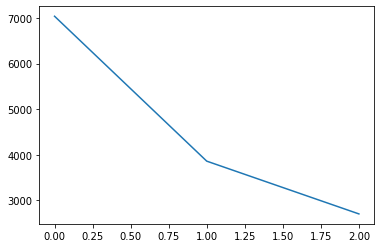

In [35]:
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
plt.plot(range(epochs), history['train_loss'])
plt.show()

In [38]:
correct = 0
total = 0
with torch.no_grad():
    for y in range(len(test_data)):
        data = torch.from_numpy(test_data[y]).float()
        data = data.view(1,1,1000,21)
        tqwe = torch.LongTensor(d[y])
        outputs = cnn(data)
        
        _, predicted = torch.max(outputs.data, 1)
        total = tqwe.size(0)
         #print(predicted)
        correct += predicted.sum().item()
    print('Accuracy : %.2f' %(float((100 * correct) / len(test_data))))

Accuracy : 100.00


In [39]:
#criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 0.00001
optimizer = optim.Adam(cnn.parameters(), lr=learning_rate)
# hyper-parameters
epochs = 3

historyy = {
    'test_loss' : []
}

for e in range(epochs):
    running_loss = 0
    t = 0
    for i in range(len(test_data)):
            cnn.eval()

            tqwe = float(d[i])
            
            if tqwe == 1:
                index_value = torch.FloatTensor([[0.0,tqwe]])
            else:
                index_value = torch.FloatTensor([[tqwe,0.0]])
            #index_value = torch.LongTensor(index_data[i])
            data = torch.from_numpy(test_data[t]).float()
            data = data.view(1,1,1000,21)

            optimizer.zero_grad()
            model_output = cnn(data)
            loss_fn = nn.BCELoss()
            loss = loss_fn(model_output, index_value)
            
            #loss = criterion(model_output,index_value)
            loss.backward()
            # weight update
            optimizer.step()
            t = t + 1 
            running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(test_data)))
        
    historyy['test_loss'].append(running_loss)

Epoch 1 - Training loss: 0.11876496177122879
Epoch 2 - Training loss: 0.10759915915502619
Epoch 3 - Training loss: 0.09722834872260762


In [40]:
s=[]
ss=[]
sss = 0.000100

ssss= history['train_loss']
sssss=historyy['test_loss']

for i in range (len(ssss)):
    s.append(ssss[i]*sss)
    ss.append(sssss[i]*sss)

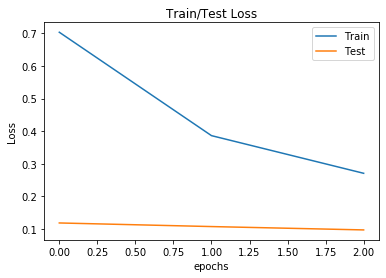

In [41]:
fig = plt.figure()
plt.plot(range(epochs), s, label = 'Train')
plt.plot(range(epochs), ss, label = 'Test')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('Train/Test Loss')
plt.legend()
plt.show()

In [42]:
from torch.utils.data import DataLoader
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [43]:
test_set